### Câu 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./dataset/forestfires.csv')
df.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
50,4,4,sep,thu,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,0.00
483,8,6,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,0.00
122,3,4,sep,sun,92.4,124.1,680.7,8.5,22.5,42,5.4,0.0,0.00
468,6,5,mar,thu,91.3,20.6,43.5,8.5,13.3,27,3.6,0.0,6.61
465,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0.0,6.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [11]:
def convert_month(month):
  dict_month = {
      'jan': 1,
      'feb': 2,
      'mar': 3,
      'apr': 4,
      'may': 5,
      'jun': 6,
      'jul': 7,
      'aug': 8,
      'sep': 9,
      'oct': 10,
      'nov': 11,
      'dec': 12
  }
  return dict_month[month]

def convert_day(day: str) -> int:
  dict_day = {
      'mon': 0,
      'tue': 1,
      'wed': 2,
      'thu': 3,
      'fri': 4,
      'sat': 5,
      'sun': 6
  }
  return dict_day[day]

In [12]:
df['day'] = df['day'].apply(convert_day)
df['month'] = df['month'].apply(convert_month)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


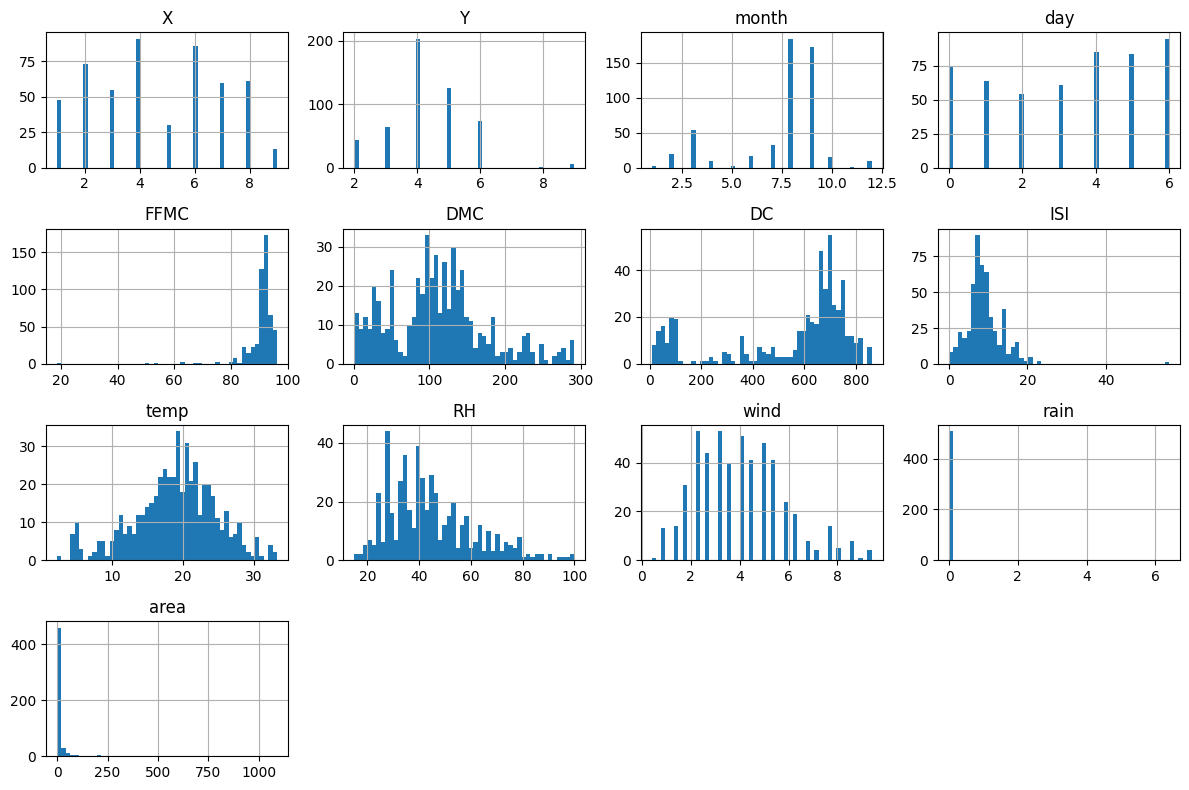

In [16]:
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

In [17]:
matrix = df.to_numpy()

In [19]:
X = matrix[:, :-1]
y = matrix[:,-1]

print(X.shape, y.shape, sep=', ')

(517, 12), (517,)


In [ ]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep=', ')

(413, 12), (413,), (104, 12), (104,)


In [57]:
class LinearRegression:
    def __init__(self):
        self.__theta = None 

    def fit(self, X_train, y_train):
        self.__theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    def get_theta(self):
        return self.__theta
    
    def predict(self, X_test):
        return X_test @ self.__theta

    def rmse(self, y_true, y_pred):
        return np.square (y_true - y_pred).mean()**0.5
    

model = LinearRegression()

In [55]:
model.fit(X_train, y_train)
print(model.get_theta())

[  1.10050614  -0.45029193   2.91365808   1.83374128  -0.0394413
   0.11030452  -0.02604095  -0.92652922   0.31788735  -0.24756586
   0.02313453 -12.01475469]


In [56]:
y_predict = model.predict(X_test)
print(model.rmse(y_test, y_predict))

79.98777585416208


### Câu 2

In [40]:
def normalize_data(df, columns):
    for column in columns:
        mean = np.mean(df[column])
        std = np.std(df[column])
        if std != 0:
            df[column] = (df[column] - mean) / std
        else:
            df[column] = df[column]
    return df

In [42]:
columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'area']
normalized_df = normalize_data(df, columns=columns)
normalized_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,51,1.498614,0.0,-0.202020
1,7,4,10,1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,33,-1.741756,0.0,-0.202020
2,7,4,10,5,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,33,-1.518282,0.0,-0.202020
3,8,6,3,4,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,97,-0.009834,0.2,-0.202020
4,8,6,3,6,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,99,-1.238940,0.0,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,6,-1.640083,-0.846648,0.474768,-1.563460,1.536084,32,-0.736124,0.0,-0.100753
513,2,4,8,6,-1.640083,-0.846648,0.474768,-1.563460,0.519019,71,0.995798,0.0,0.651674
514,7,4,8,6,-1.640083,-0.846648,0.474768,-1.563460,0.398350,70,1.498614,0.0,-0.026532
515,1,4,8,5,0.680957,0.549003,0.269382,0.500176,1.156839,42,-0.009834,0.0,-0.202020


In [43]:
normalized_matrix = normalized_df.to_numpy()
X_normalized, y_normalized = normalized_matrix[:,:-1], normalized_matrix[:,-1]
print(X.shape, y.shape)

(517, 12) (517,)


In [45]:
split = int(0.8 * X.shape[0])
X_normalized_train, X_normalized_test = X_normalized[:split], X_normalized[split:]
y_normalized_train, y_normalized_test = y_normalized[:split], y_normalized[split:]
print(X_normalized_train.shape, y_normalized_train.shape, X_normalized_test.shape, y_normalized_test.shape)

(413, 12) (413,) (104, 12) (104,)


In [92]:
model.fit(X_normalized_train, y_normalized_train)
print(model.get_theta())

[ 0.01625059 -0.0111333   0.01500143  0.02597139  0.00029939  0.10563326
 -0.02488945 -0.06575867  0.00680363 -0.00529528  0.00732401 -0.15309903]


In [93]:
y_normalized_predict = model.predict(X_normalized_test)
print(model.rmse(y_normalized_test, y_normalized_predict))

1.2573345249252663


### Nhận xét 

Sau khi chuẩn hóa thì sai số đã giảm hẳn độ sai lệch trên độ đo rmse

### Câu 3

In [104]:
import seaborn as sns

def heatmap_show(corr_matrix):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

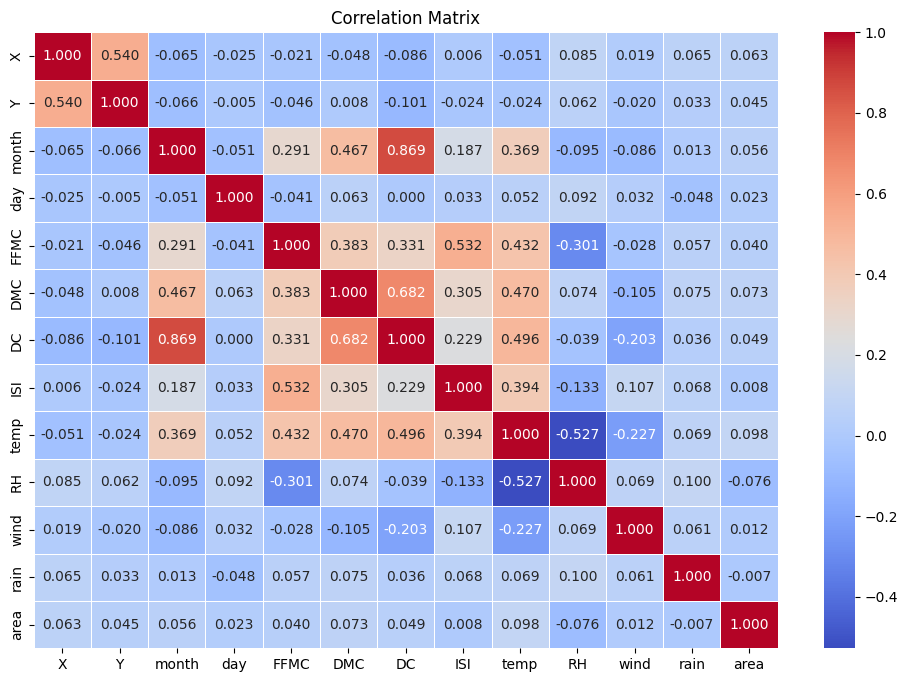

In [105]:
corr_matrix = df.corr()
heatmap_show(corr_matrix)

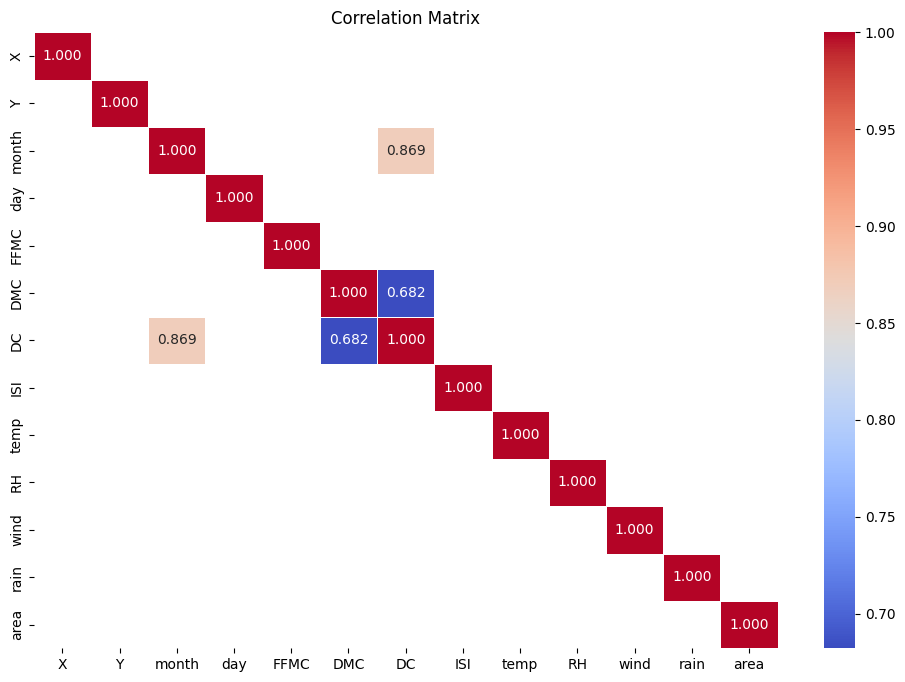

In [106]:
high_corr_matrix = corr_matrix[abs(corr_matrix) > 0.6]
heatmap_show(high_corr_matrix)

### Nhận xét

Độ tương quan giữa DMC và DC là 0.68 nhưng vì DC có độ tương quan với month (0.87) nên loại bỏ DMC

In [87]:
normalized_df = normalized_df.drop(['DMC'], axis=1)
normalized_df.shape

(517, 12)

In [89]:
matrix = normalized_df.to_numpy()
X = matrix[:,:-1]
y = matrix[:,-1]
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 11), (413,), (104, 11), (104,))

In [94]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.rmse(y_test, y_pred))

1.2587523897826842


### Câu 4

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error as rmse

In [97]:
X = df.drop('area', axis=1)
y = df['area']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 12), (413,), (104, 12), (104,))

In [100]:
columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [101]:
# Reshape y_train and y_test into 2D arrays for StandardScaler
y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

y_train_scaled = scaler.fit_transform(y_train_2d)
y_test_scaled = scaler.transform(y_test_2d)

y_train = pd.Series(y_train_scaled.flatten(), index=y_train.index)
y_test = pd.Series(y_test_scaled.flatten(), index=y_test.index)

In [102]:
model_lib = LinearRegression()
model_lib.fit(X_train, y_train)
y_pred = model_lib.predict(X_test)
rmse_idx = rmse(y_test, y_pred)
print(rmse_idx)

2.377733969075885
